# Exercise 3

Work on this before the next lecture on 19 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/7). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

The overall idea of this exercise is to get started and the nto freely experiment with the building blocks fo keras.

# The Dataset

To get going we will use a dataset which contains images of fashion items. It was created by [Zalanod research](https://github.com/zalandoresearch/fashion-mnist) to provide an alternative to the old MNIST digits dataset. Fashion MNIST is small like MNIST (28x28 pixel images), good size (60000 examples), and significantly harder than MNIST.

There are ten classes (or types) of items:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [7]:
# plotting imports and setup
%matplotlib inline

import matplotlib.pyplot as plt

## Keras

We will use the Keras library through out this course. It is a high-level interface to tensorflow. Quoting [the keras website](https://keras.io/):

> It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
>
> Use Keras if you need a deep learning library that:
>
>   * Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
>   * Supports both convolutional networks and recurrent networks, as well as combinations of the two.
>   * Runs seamlessly on CPU and GPU.

### Note
To use keras you will have to first install it with `pip install tensorflow keras`.

In [8]:
# Fashion MNIST is built into keras
from keras.datasets import fashion_mnist

/home/stephanie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
# How is the data stored?
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


There are 60000 examples, each of shape `28x28`. This makes sense as we are dealing with images that are 28x28 pixels big. Let's look at a few.

In [11]:
# classes are already shuffled
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

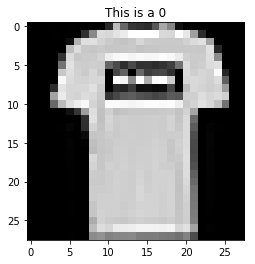

In [13]:
plt.imshow(X_train[1], cmap='gray')
plt.title("This is a %i" % y_train[1]);

In [14]:
len(y_train)

60000

> ### Challenge
>
> Make a function that plots a single example and uses a human readable label instead of an integer (replace the 9 in the previous example with "ankleboot"). You can find the human labels [here](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles).

In [15]:
import pandas as pd
import numpy as np

def plotImage(X, y, idx):
    
    def correspondance(i):
        d = {'label' : pd.Series(np.arange(0,10)),
         'classification' : pd.Series(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',\
                                       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])}

        df = pd.DataFrame(d)
        print(df)
        classification = df['classification'][i]
        
        return classification
    
    
    plt.imshow(X[idx], cmap='gray')
    corr = correspondance(y[idx])
    plt.title("This is a %s" % corr);


  classification  label
0    T-shirt/top      0
1        Trouser      1
2       Pullover      2
3          Dress      3
4           Coat      4
5         Sandal      5
6          Shirt      6
7        Sneaker      7
8            Bag      8
9     Ankle boot      9


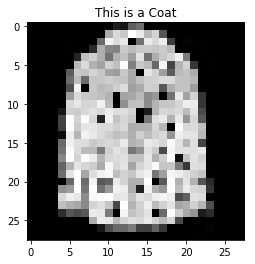

In [16]:
plotImage(X_train, y_train, 3784)

# A first neural network

Let's build a first neural network. Fit it to some toy data. In its simple form this is equivalent to performing logistic regression. Experiment with different toy datasets and adding more layers of different widths to the network. Try out different activation functions (nonlinearities).

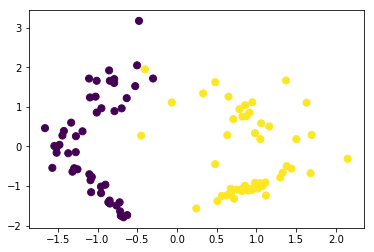

In [17]:
from sklearn.datasets import make_classification


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=50)

In [18]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [19]:
import numpy as np


def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

# y is the class of each point, need to convert it in order to have the correct dimensions
Y_ = one_hot(2, y)

nice link for activation functions: 
    https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

In [20]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

np.random.seed(123+3)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))
print(inputs)

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(2)(inputs)
print(x)
# to find out more about activations check the keras documentation
predictions = Activation('softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
# to fit the model uncomment this line, experiment with the various settings

#Number of epochs means how many times you go through your training set.
#The model is updated each time a batch is processed, which means that it can be updated multiple times during one epoch. 
#If batch_size is set equal to the length of x, then the model will be updated once per epoch. 

model.fit(X, Y_, epochs=500, verbose=False, batch_size=2)

Tensor("input_1:0", shape=(?, 2), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)


In [21]:
model.predict(np.array([[1,.9], [1,-.9]]))

array([[1.9359491e-04, 9.9980646e-01],
       [2.1237523e-04, 9.9978763e-01]], dtype=float32)

## Questions

* plot the decision surface of the network
* create a circle-in-circle dataset and try to classify it
  * basically try to repliacte [this tensorflow playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.88320&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) setup or something similar to it.
  
  
---

In [22]:
from keras.utils import plot_model
plot_model(model, to_file='test-net.png')

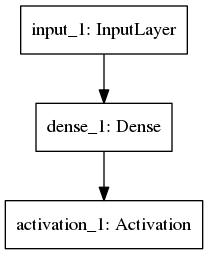

In [23]:
from IPython.display import Image

Image(filename="test-net.png")

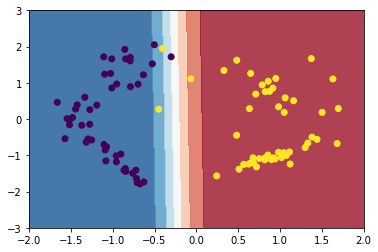

In [24]:
from utils import plot_surface

plot_surface(model, X, y, xlim=[-2., 2.], ylim = [-3., 3.])

In [25]:
#create a circle-in-circle dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

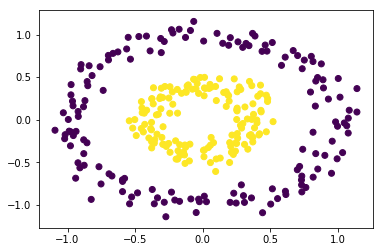

In [26]:
X,y = make_circles(n_samples=300, shuffle=True, noise=0.08, random_state=None, factor=0.4)

plt.scatter(X[:,0], X[:,1], c=y)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)
np.shape(X_train)

/home/stephanie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(210, 2)

In [28]:
#need to convert y to a n x 2 matrix
Y_train_ = one_hot(2, y_train)

In [29]:
Y_val_ = one_hot(2, y_val)

In [30]:
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import optimizers

np.random.seed(123)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(6)(inputs)
x = Activation('tanh')(x)
x = Dense(4)(x)
x = Activation('tanh')(x)
x = Dense(2)(x)

# to find out more about activations check the keras documentation
predictions = Activation('softmax')(x)

#define optimizer
adm = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=adm,
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

#Number of epochs means how many times you go through your training set.
history = model.fit(X_train, Y_train_, epochs=200, verbose=False, batch_size=2, validation_data=(X_val, Y_val_))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total para

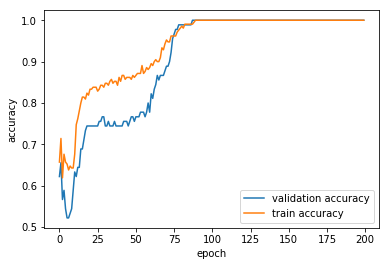

In [32]:
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.plot(history.history['acc'], label='train accuracy')
#plt.ylim([0, ])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')

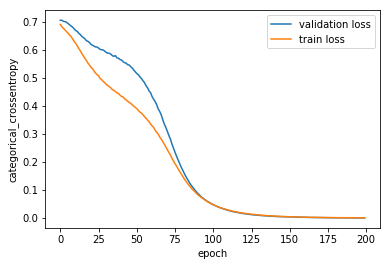

In [33]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='train loss')
#plt.ylim([0, ])
plt.xlabel('epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()

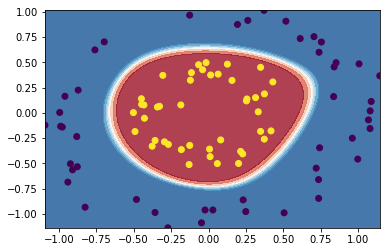

In [34]:
from utils import plot_surface

plot_surface(model, X_val, y_val)

In [35]:
predictions = model.predict(X_val)
print('First prediction:', predictions[0])
 
score = model.evaluate(X_val, Y_val_, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

First prediction: [9.9996448e-01 3.5577385e-05]
Test loss: 0.00047297936915937397
Test accuracy: 1.0


# Fashion neural network

Now let's graduate to classifying fashion items. The structure should be very similar to the simple neural network but you might need more layers of different widths.

* what network structures work?
  * more layers or wider layers or both?
* how good can you make your network?
  * what did you use as baseline to compare your performance to?
* experiment!
* (bonus) how does your NN compare to a random forest with about 200 trees (or some other decision tree based classifier)?

In [36]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Split off some validation data

To measure our Neural Networks performance we will need some validation data. The `train_test_split` helper from scikit-learn does this for us.

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

In [38]:
y_train

array([5, 0, 0, ..., 6, 6, 1], dtype=uint8)

### One more thing

We need to convert the labels from integers (0, 1, 2, 3, ...) to  a one-hot encoding. The one-hot encoding for a problem with ten classes is a ten dimensional vector for each sample. For a sample in class 4 every entry is zero except for the fourth one. Let's check it out:

In [39]:
from keras import utils


num_classes = 10
y_train_ = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [40]:
y_train[:5]

array([5, 0, 0, 1, 4], dtype=uint8)

In [41]:
# modified y
y_train_[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [42]:
# let's make y_train the same as the others
y_train = utils.to_categorical(y_train, num_classes)

# Model building

We now define the model architecture and train the model. To learn more about the building blocks that are available check out the [keras documentation](https://keras.io/layers/about-keras-layers/).

In [43]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten

This is my baseline model

In [44]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)

h = Flatten()(x)
h = Dense(10)(h)
h = Activation('tanh')(h)

# we want to predict one of ten classes
h = Dense(10)(h)
y = Activation('softmax')(h)

# Package it all up in a Model
net = Model(x, y)

## Model structure

You can print out the structure of your network and check how many parameters it has, etc

In [45]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [46]:
net.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [47]:
batch_size = 128
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.4486 - acc: 0.6119 - val_loss: 1.1482 - val_acc: 0.6787
Epoch 2/20
50000/50000 [==============================] - 1s 24us/step - loss: 1.0142 - acc: 0.7122 - val_loss: 0.9288 - val_acc: 0.7260
Epoch 3/20
50000/50000 [==============================] - 1s 24us/step - loss: 0.8537 - acc: 0.7503 - val_loss: 0.8128 - val_acc: 0.7532
Epoch 4/20
50000/50000 [==============================] - 1s 27us/step - loss: 0.7602 - acc: 0.7728 - val_loss: 0.7388 - val_acc: 0.7720
Epoch 5/20
50000/50000 [==============================] - 1s 26us/step - loss: 0.6981 - acc: 0.7883 - val_loss: 0.6858 - val_acc: 0.7851
Epoch 6/20
50000/50000 [==============================] - 1s 25us/step - loss: 0.6537 - acc: 0.7997 - val_loss: 0.6482 - val_acc: 0.7937
Epoch 7/20
50000/50000 [==============================] - 1s 24us/step - loss: 0.6201 - acc: 0.8080 - val_loss: 0.6220 - val_acc

With my baseline model, I reach 83.87% accuracy for the train set and 83.26% accuracy for the validation set.

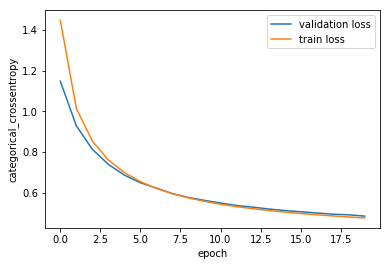

In [48]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='train loss')
#plt.ylim([0, ])
plt.xlabel('epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()

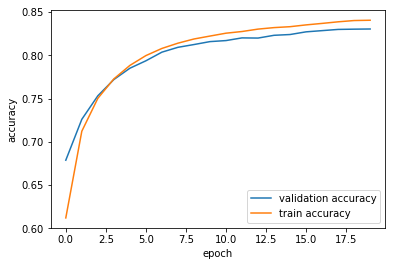

In [49]:
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.plot(history.history['acc'], label='train accuracy')
#plt.ylim([0, ])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')

Now I'm trying to improve the model by using a first node that is wider and adding more nodes

In [50]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)
h = Flatten()(x)

#
# your network architecture here
h = Dense(40)(h)
h = Activation('tanh')(h)
h = Dense(20)(h)
h = Activation('tanh')(h)
h = Dense(10)(h)
h = Activation('tanh')(h)
#

# we want to predict one of ten classes
h = Dense(10)(h)
y = Activation('softmax')(h)

# Package it all up in a Model
net = Model(x, y)

In [51]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 40)                31400     
_________________________________________________________________
activation_7 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                820       
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
__________

In [52]:
net.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [53]:
batch_size = 128
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.5310 - acc: 0.5749 - val_loss: 1.2314 - val_acc: 0.6856
Epoch 2/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.0732 - acc: 0.7132 - val_loss: 0.9659 - val_acc: 0.7242
Epoch 3/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.8740 - acc: 0.7471 - val_loss: 0.8196 - val_acc: 0.7498
Epoch 4/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.7567 - acc: 0.7671 - val_loss: 0.7267 - val_acc: 0.7668
Epoch 5/20
50000/50000 [==============================] - 2s 31us/step - loss: 0.6807 - acc: 0.7793 - val_loss: 0.6635 - val_acc: 0.7784
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.6285 - acc: 0.7902 - val_loss: 0.6202 - val_acc: 0.7903
Epoch 7/20
50000/50000 [==============================] - 2s 31us/step - loss: 0.5895 - acc: 0.8010 - val_loss: 0.5871 - val_acc

With the improved model, I reach 86.41% accuracy for the train set and 85.17% accuracy for the validation set.

When we are approaching the same number of free parameters as the number of samples, performance doesn't increase anymore.
We should have a larger number of nodes in the first layers and then decrease to 10. 
Choosing wider nodes really increases performance. Adding more too but seems less fast.

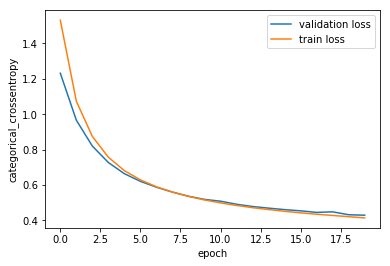

In [54]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='train loss')
#plt.ylim([0, ])
plt.xlabel('epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()

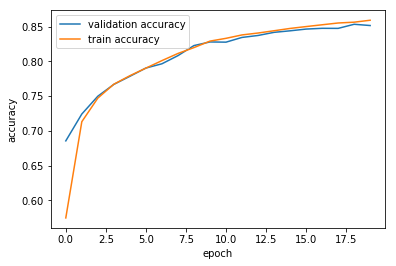

In [55]:
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.plot(history.history['acc'], label='train accuracy')
#plt.ylim([0, ])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')

In [56]:
# predictions = model.predict(X_test[:,0])
# print('First prediction:', predictions[0])
 
# score = model.evaluate(X_val[:,0], y_val, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Comparing with random forest performance

In [57]:
from sklearn.model_selection import train_test_split
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

In [59]:
#tunning the random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

p = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=p)
CV_rfc.fit(np.ravel(X_train), np.ravel(y_train))

print('Best parameters:', CV_rfc.best_params_)
print('Score with best parameters:', CV_rfc.best_estimator_.score(X_val, y_val))

ValueError: Found input variables with inconsistent numbers of samples: [39200000, 50000]

In [ ]:
X_train.reshape(60000, 28*28*1)